In [1]:
import pandas as pd
import numpy as np
import math
import os
from test_class import Test
os.environ['PYTHONHASHSEED'] = str(50)
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [2]:
def bin_append(set_ree, count, pset_size):
    intersect_val = 1
    subset = []

    while(intersect_val < pset_size):
        if count & intersect_val:
            index = int(math.log(intersect_val, 2))
            subset.append(set_ree[index])
        
        intersect_val *= 2

    return subset

def gen_power_set(set_ree):
    power = []
    count = 0

    pset_size = int(2 ** len(set_ree))

    for i in range(pset_size):
        power.append(bin_append(set_ree, count, pset_size))
        count = count + 1

    power.sort(key = lambda x : len(x))
    return power

In [3]:
rounds = 50
dataset = pd.read_csv('RTT_data.csv')
data_args = {
    'data seed': 11,
    'distance clients': [0, 2, 3, 6],
    'distance augments': [0.5, 0.5, 0.5, 0.5],
    'tolerance': 5,
    'exclude dtypes': 'object',
    'drop labels': ['GroundTruthRange[m]'],
    'target labels': ['GroundTruthRange[m]'],
    'test size 1': 0.2,
    'test size 2': 0.25
}

Mt = (np.ones(rounds) * 5).astype('int32')
model_seed = 50
test = Test(dataset, data_args, Mt, model_seed)

In [4]:
test.split(scheme = 3, args = (2, 5))
test.display_metadata()

Number of samples: 29581
Features per sample: 10

Columns:
%Timestamp[s], GroundTruthPositionX[m], GroundTruthPositionY[m], GroundTruthPositionZ[m], ML_range_estimate[m], AP_positionX[m], AP_positionY[m], AP_positionZ[m], AP_index, ToD_factor[m]

Clients: 10
Total Client Training Samples: 17742 (59.98%)
Total Client Training Labels: 17742
Total Validation Samples: 5920 (20.01%)
Total Validation Labels: 5920
Total Test Samples: 5919 (20.01%)
Total Test Labels: 5919


In [5]:
test.display_client_distribution()

Data Distribution
Client 1: 1.68%
Client 2: 2.31%
Client 3: 3.65%
Client 4: 7.63%
Client 5: 18.03%
Client 6: 10.41%
Client 7: 10.58%
Client 8: 17.03%
Client 9: 12.46%
Client 10: 16.23%

Distance Distribution w.r.t. Max Distance
Client 1: 68.42%
Client 2: 1.13%
Client 3: 84.83%
Client 4: 100.00%
Client 5: 24.36%
Client 6: 28.14%
Client 7: 58.71%
Client 8: 28.25%
Client 9: 54.60%
Client 10: 49.32%


In [12]:
w, b, fedavg_test_mse, fedavg_log = test.run_fedavg_test(rounds = rounds, frac_clients = 0.5)
log_path = 'history/important baselines/fedavg_log_5_scheme3b.npy'
test_path = 'history/important baselines/fedavg_test_mse_5_scheme3b.npy'
np.save(log_path, fedavg_log)
np.save(test_path, fedavg_test_mse)
test.load_baseline_fedavg_data(test_path, log_path)

Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50


In [13]:
base_avg = test.average_error((w, b), 0)
base_avg

Avg Error: 2.39352400198575


In [7]:
a_search = np.logspace(-3, 3, 7)
l_search = np.logspace(-3, 3, 7)
test.confeddi_gs(a_search, l_search, rounds = rounds, context = [0])

Training Model 1
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 2
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 3
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 4
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 5
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 6
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 7
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 8
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 9
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 10
Round 5
Round 10
Ro

{(0.001,
  0.001): ([array([[ 3.26029152e-01, -2.10393205e-01, -2.70073023e-02,
           -1.84992850e-01,  2.40984753e-01, -7.02517480e-02,
            1.68147904e-04,  1.41334347e-02,  2.62155175e-01,
           -3.22486997e-01, -3.11780244e-01,  1.92359895e-01,
           -2.47724146e-01, -1.98615968e-01,  2.59595225e-04,
            5.08276299e-02,  9.24223512e-02, -2.20390230e-01,
           -4.55913916e-02,  2.97307402e-01,  3.83955240e-03,
           -1.50890708e-01, -1.08899742e-01,  5.87216169e-02,
            1.83417499e-01, -1.43598571e-01, -4.53041822e-01,
            6.63056523e-02, -3.68501723e-01,  6.96810186e-02,
            1.53360322e-01, -2.45439872e-01],
          [-7.66433403e-02,  4.05721426e-01, -3.21160018e-01,
            7.72739947e-02, -3.70557129e-01, -1.12630308e-01,
            6.51031971e-01, -6.21777177e-01,  1.80277050e-01,
           -1.00721896e-01, -2.28135958e-01,  1.24345340e-01,
           -2.00687736e-01, -2.90774077e-01,  7.38930404e-01,
      

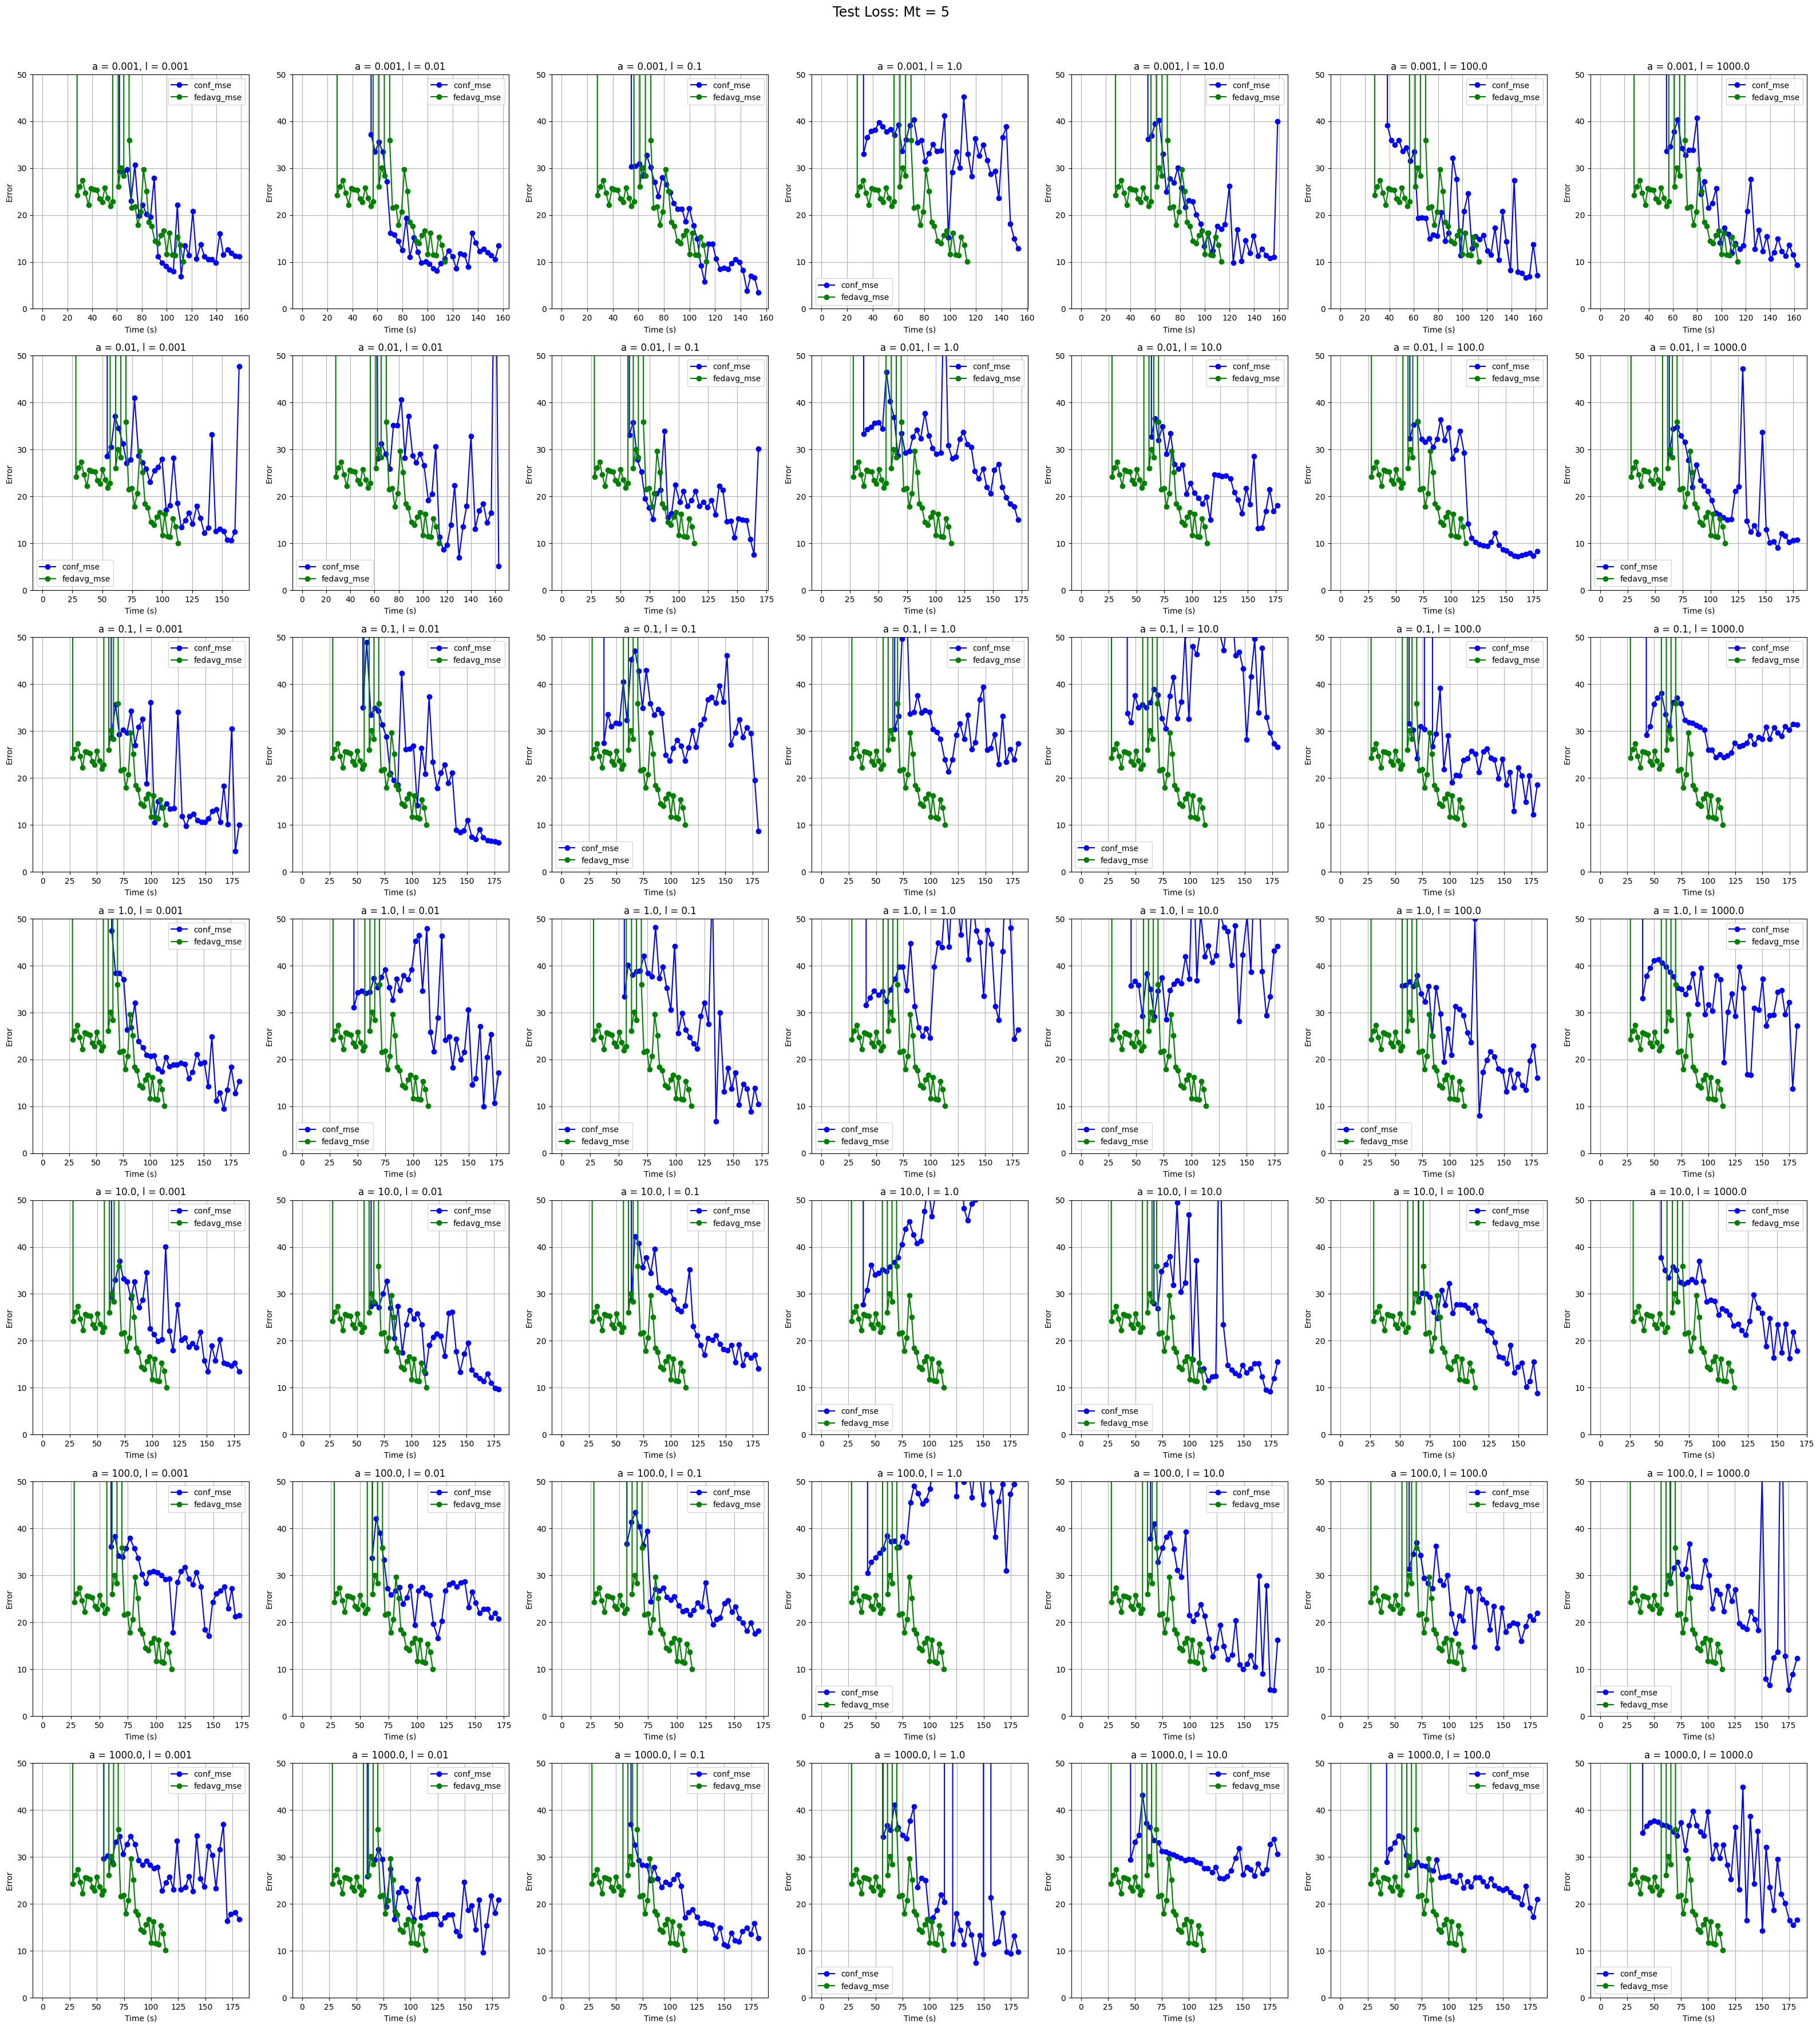

In [8]:
test.confeddi_gs_test_plots((40, 40), (0, 50))

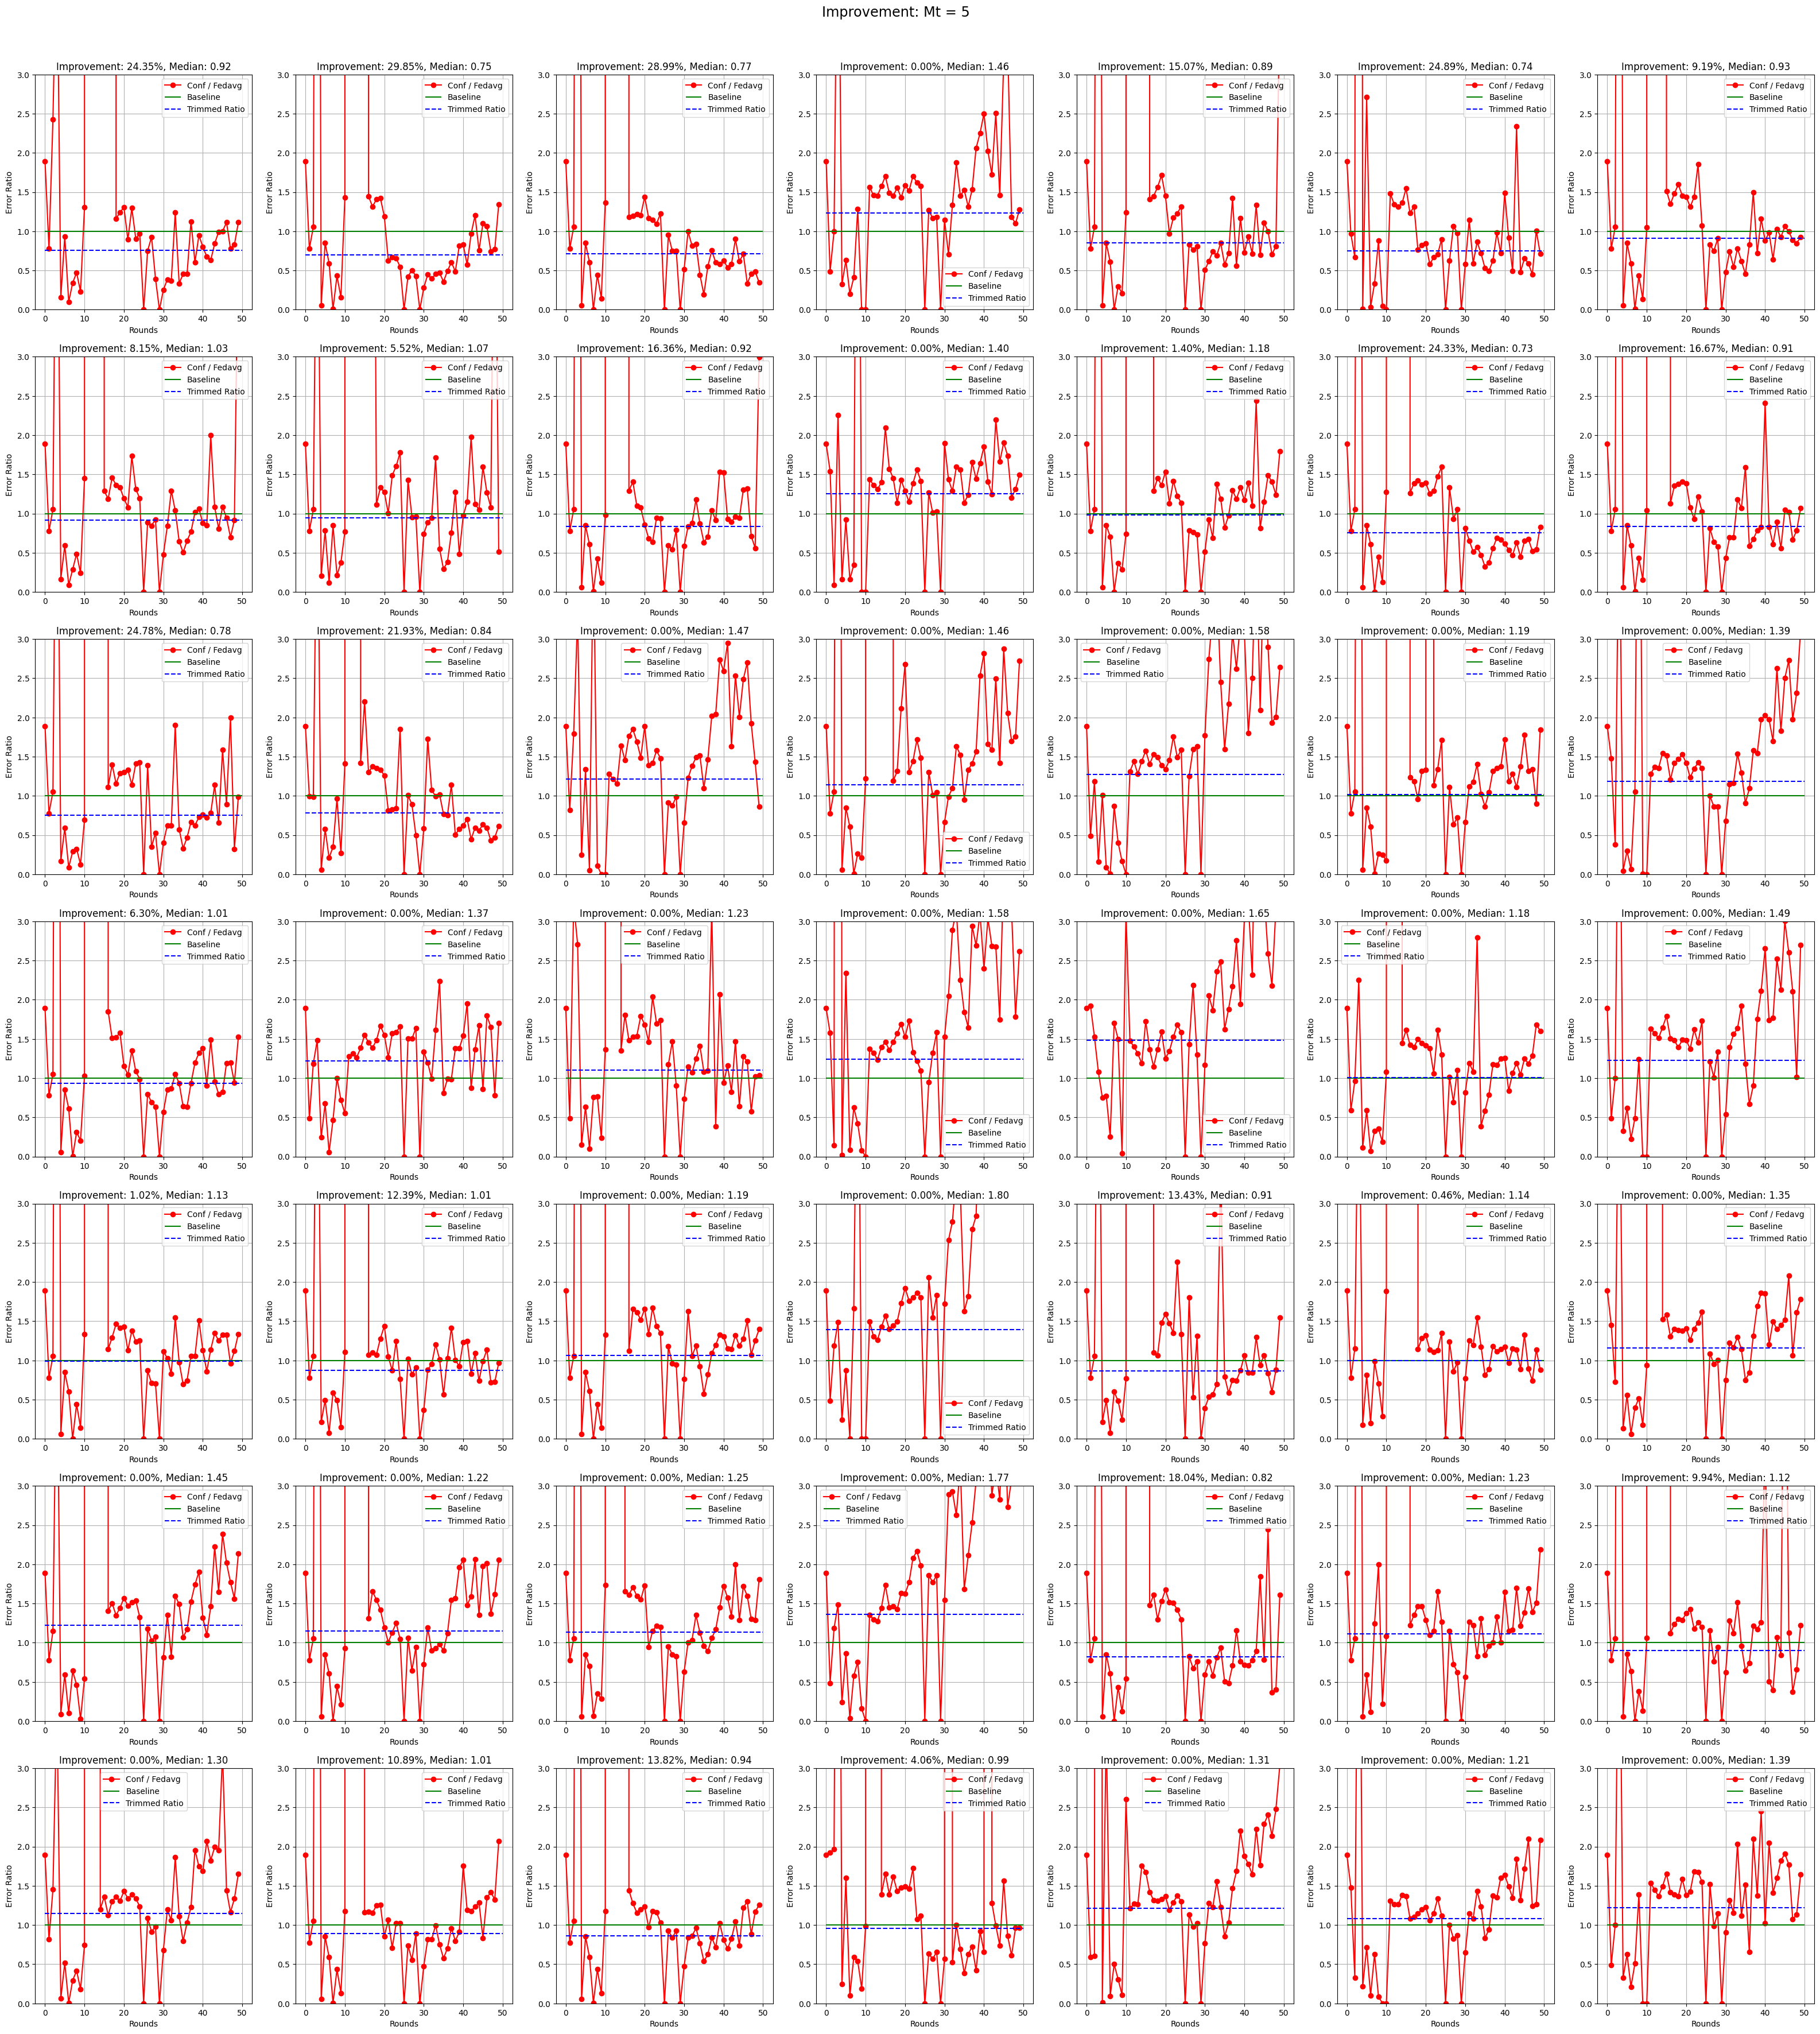

In [9]:
test.confeddi_gs_improvement_plots((40, 40), ylim = (0, 3), trim_bias = 1)

In [10]:
alpha = [0.01, 0.001]
lmbda = [100, 0.1]
as_histories = []
wb_histories = []
context_combinations = [x for x in gen_power_set([0, 1, 2, 3, 4]) if x != []]

In [11]:
for a, l in zip(alpha, lmbda):
    wb_history = test.confeddi_as(context_combinations, a, l, rounds = 50)
    wb_histories.append(wb_history)
    as_histories.append(test.conf_as_history)

Training Model 1
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 2
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 3
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 4
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 5
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 6
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 7
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 8
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 9
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 10
Round 5
Round 10
Ro

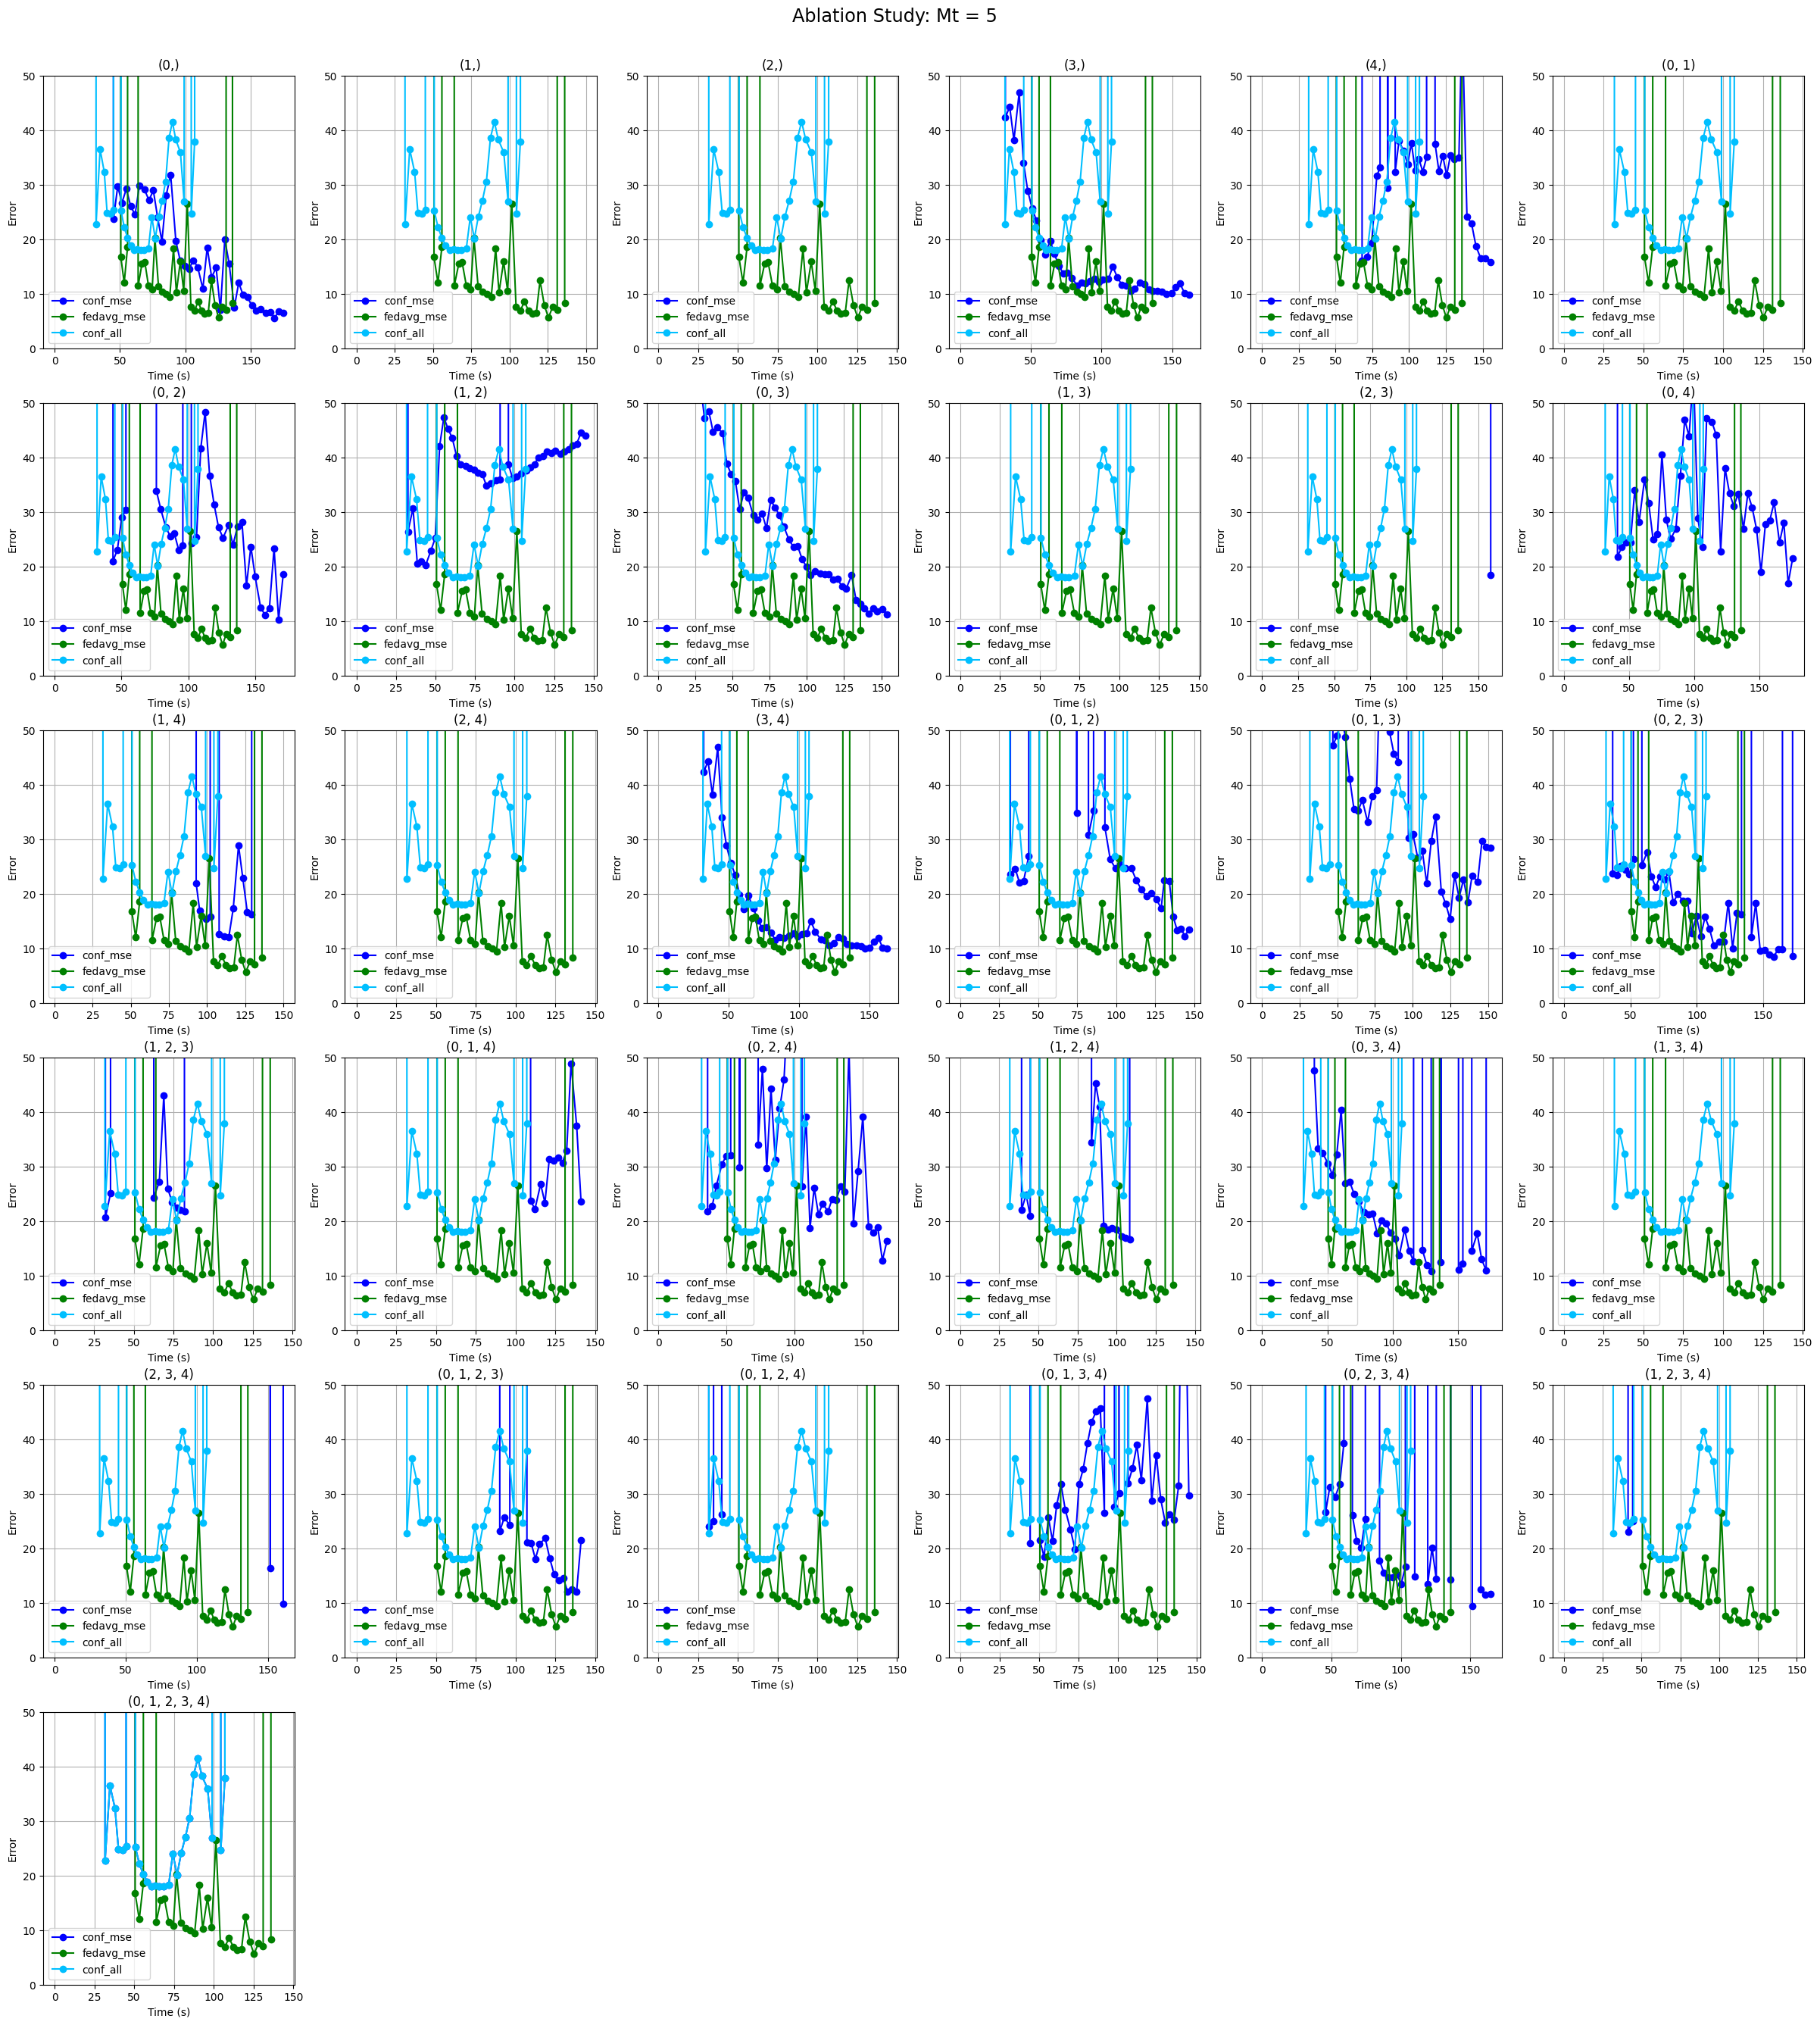

In [12]:
# a = 1000, l = 0.1
test.conf_as_history = as_histories[0]
test.confeddi_as_test_plots((30, 30), (0, 50), 6, 6, top = 0.95)

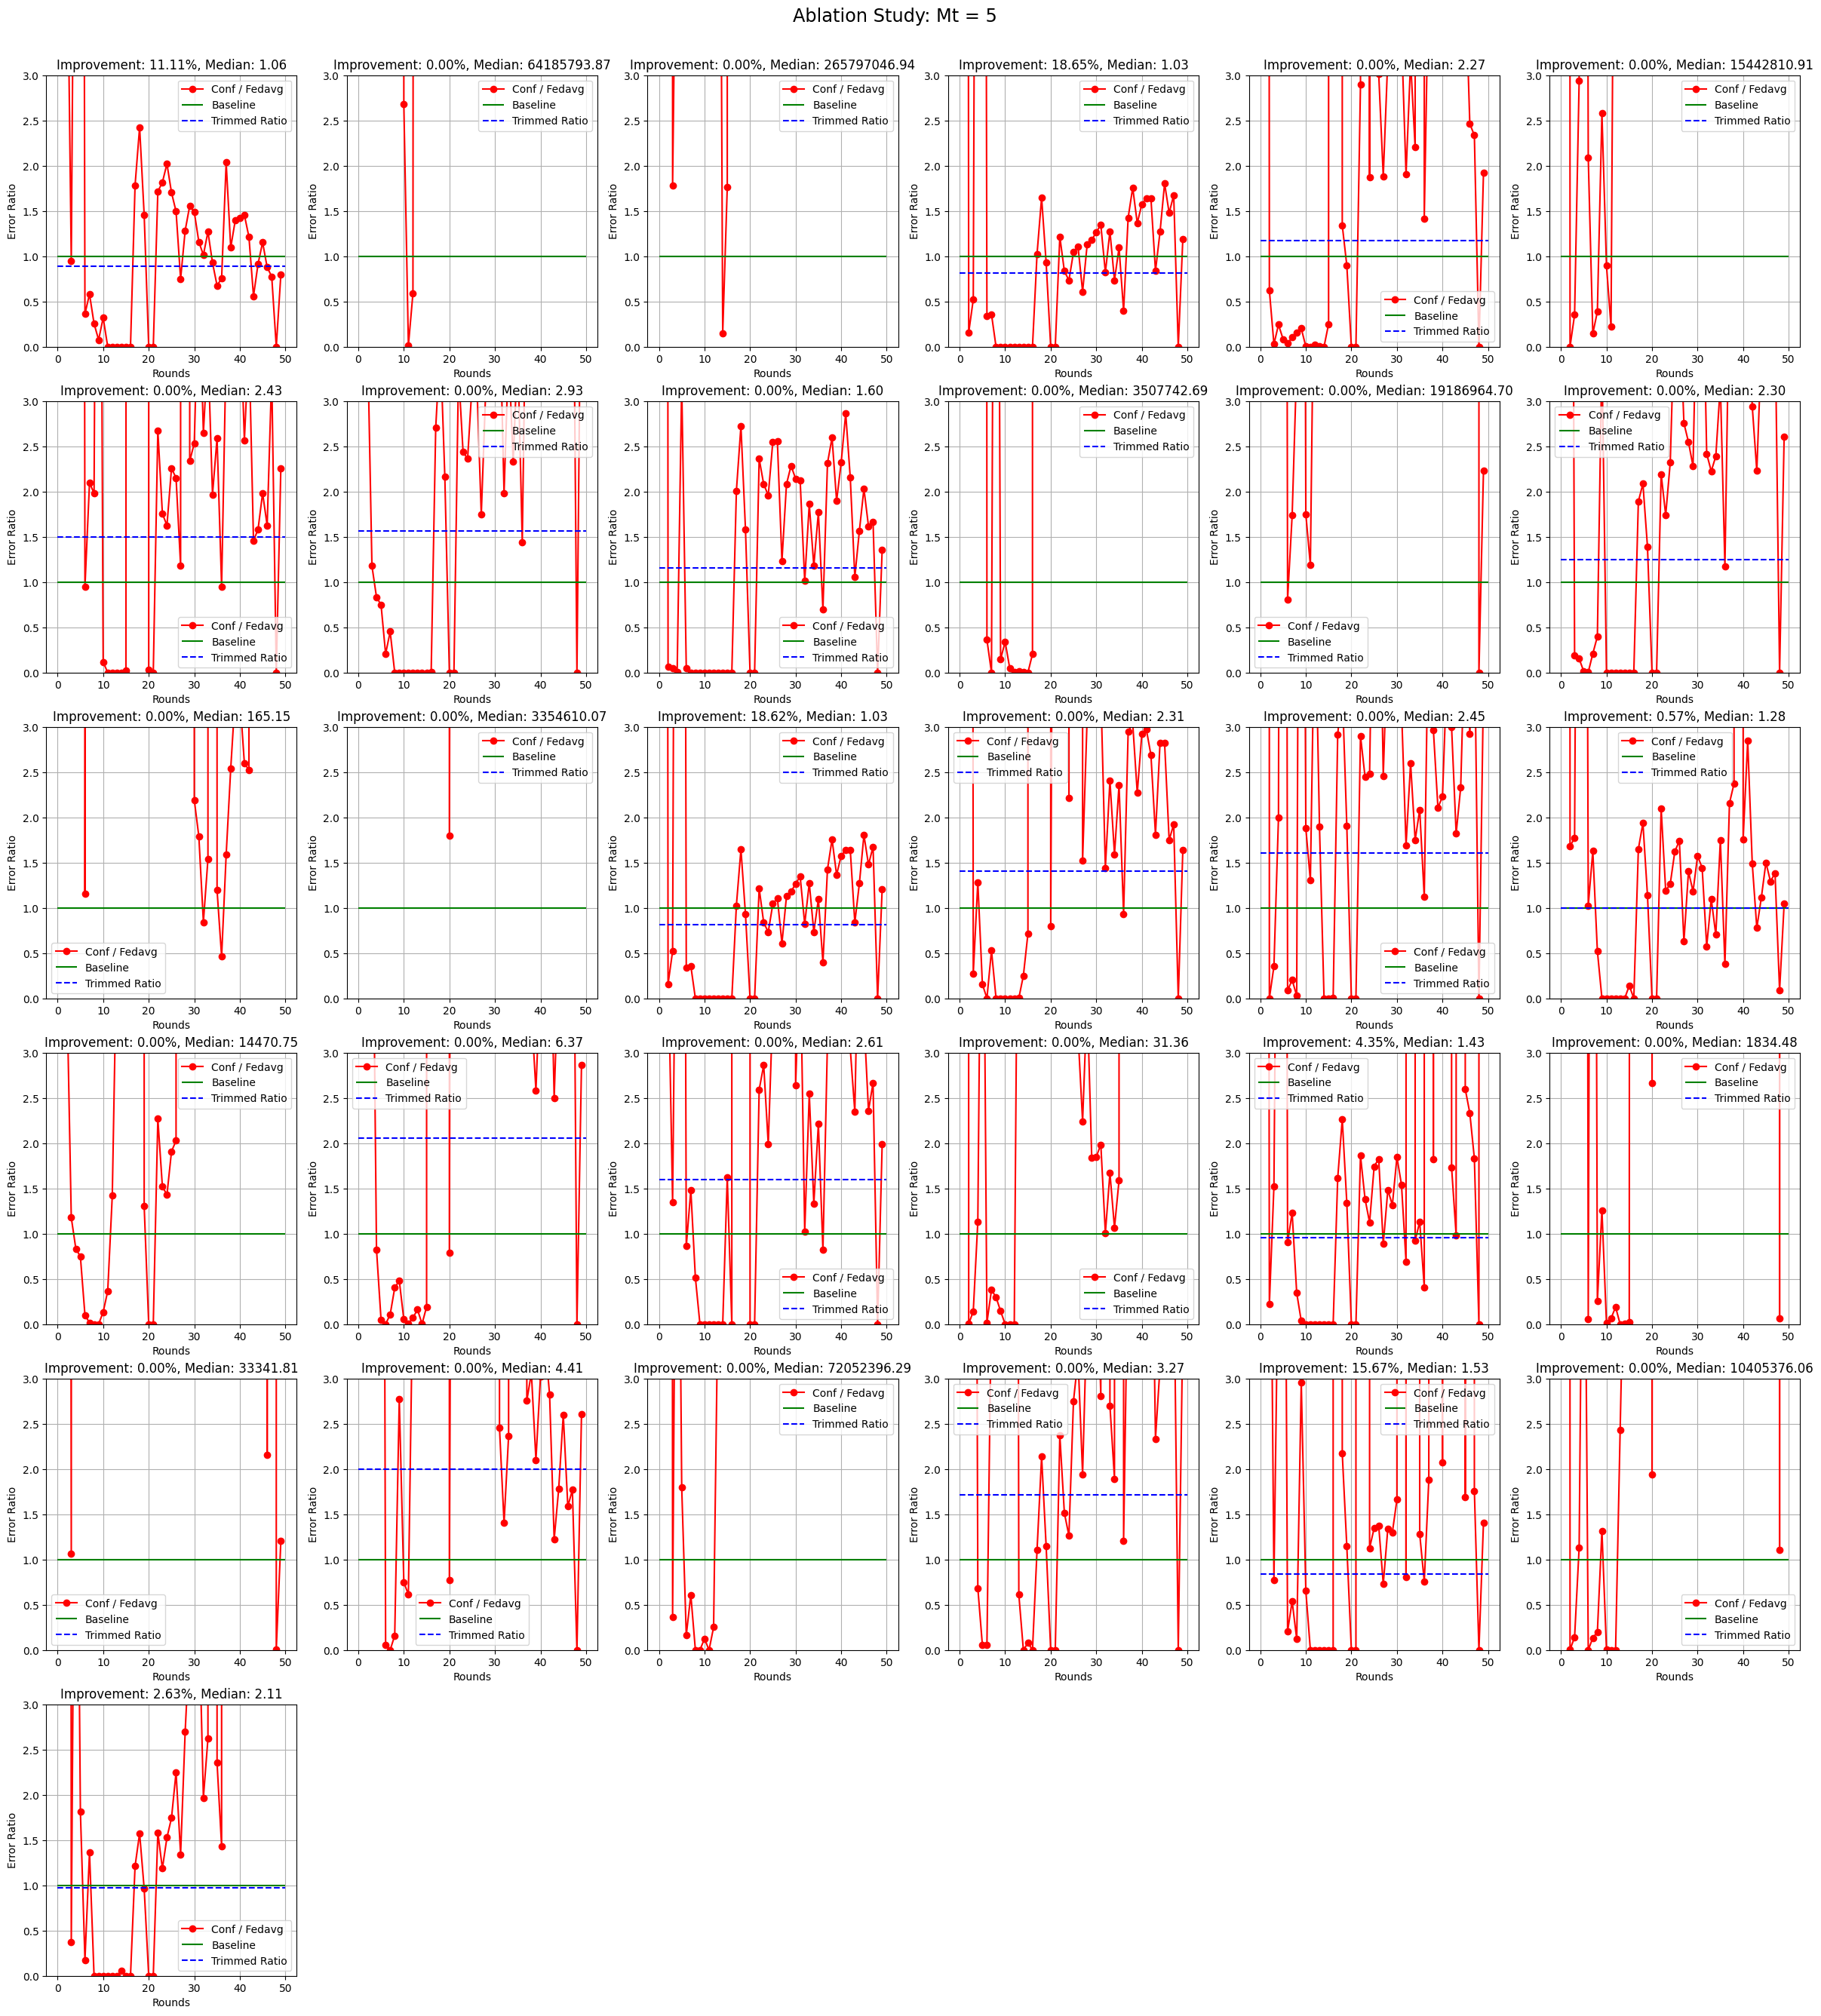

In [13]:
test.confeddi_as_improvement_plots((30, 30), 6, 6, ylim = (0, 3), trim_bias = 1, top = 0.95)

In [14]:
wb_set_1 = wb_histories[0]
for w, b in wb_set_1.values():
    test.average_error((w, b), 0)

Avg Error: 3.025320266779329
Avg Error: 3.383599264692631
Avg Error: 3.360457296076557
Avg Error: 3.7667761031951232
Avg Error: 2.7668238681860644
Avg Error: 2.573922794646387
Avg Error: 2.390278886855951
Avg Error: 3.170826355004491
Avg Error: 2.054657521557623
Avg Error: 2.894745083180113
Avg Error: 3.307139326600393
Avg Error: 2.251687054102408
Avg Error: 85.16039606650581
Avg Error: 3.844162260852781
Avg Error: 3.7667761031951232
Avg Error: 3.9488201869013726
Avg Error: 4.402441855767149
Avg Error: 3.0742116122864784
Avg Error: 4.042754589087775
Avg Error: 3.4376228259193886
Avg Error: 1.8523971389494152
Avg Error: 4.8951330498985035
Avg Error: 2.516203058453011
Avg Error: 3.4145659215063806
Avg Error: 3.307139326600393
Avg Error: 3.971352399020349
Avg Error: 2.5692799342002197
Avg Error: 3.3984652285910966
Avg Error: 3.4927366797916037
Avg Error: 3.3810809574755543
Avg Error: 2.700049773658858


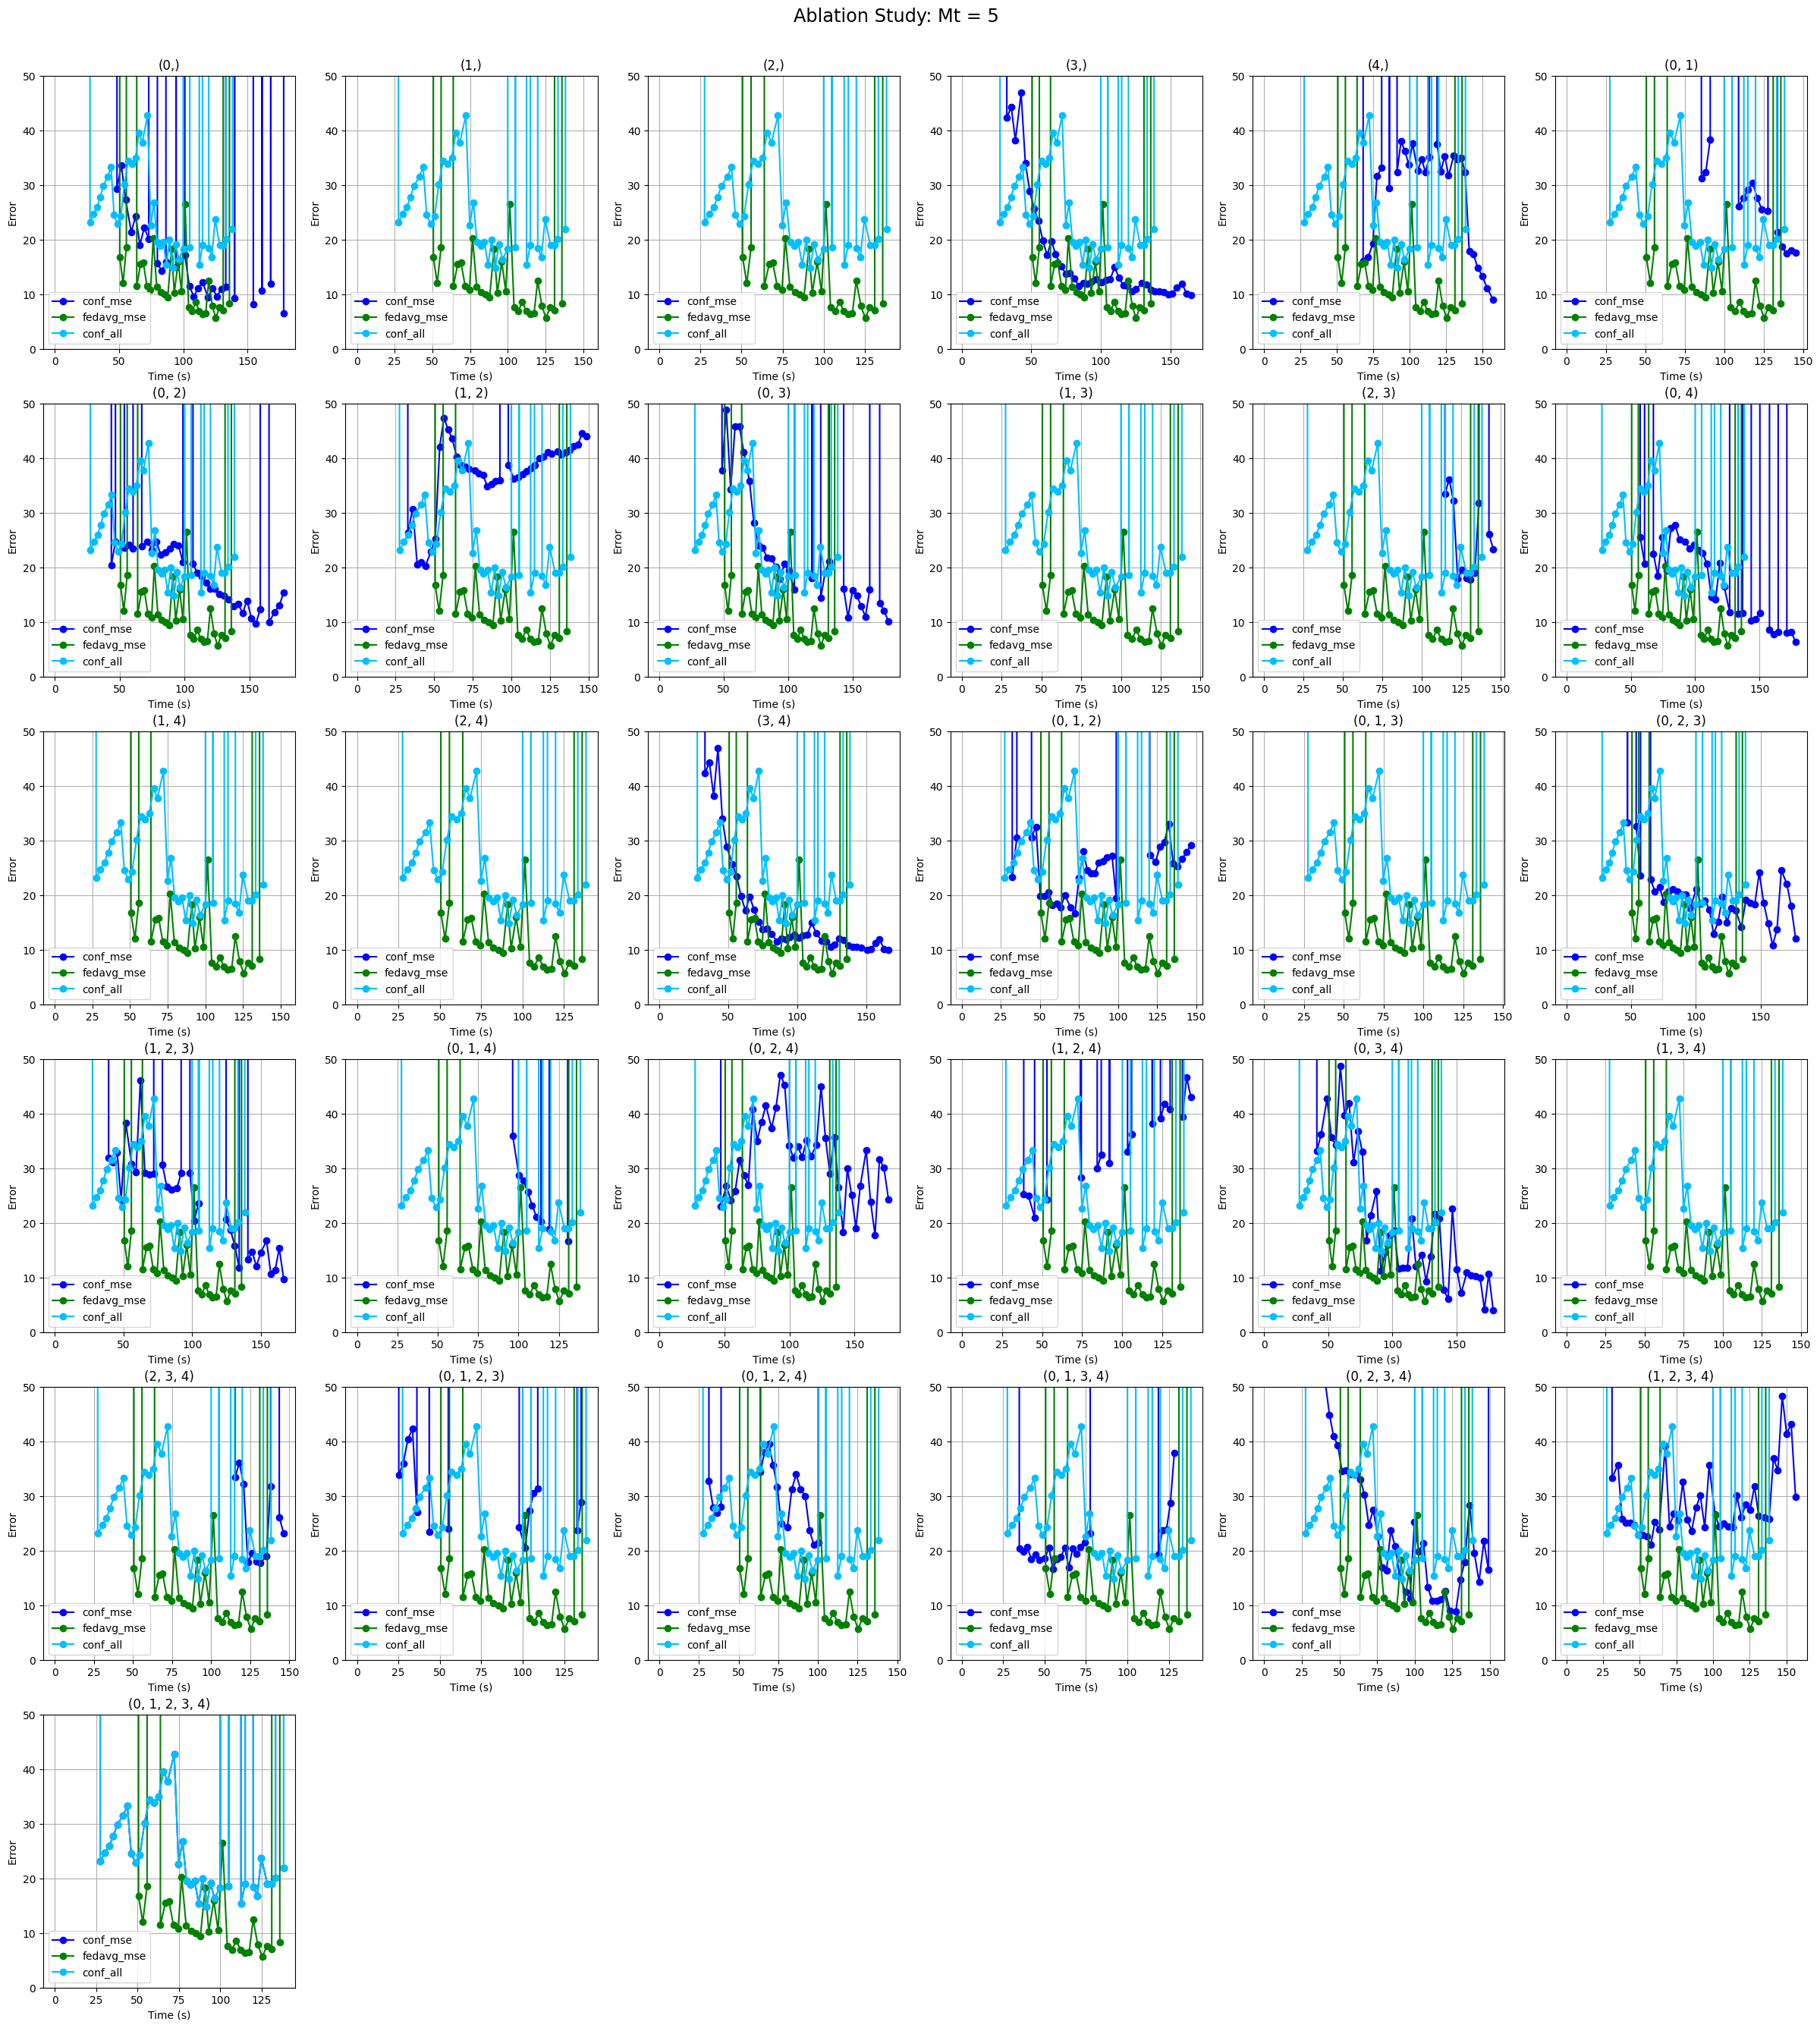

In [14]:
# a = 1, l = 1000
test.conf_as_history = as_histories[1]
test.confeddi_as_test_plots((30, 30), (0, 50), 6, 6, top = 0.95)

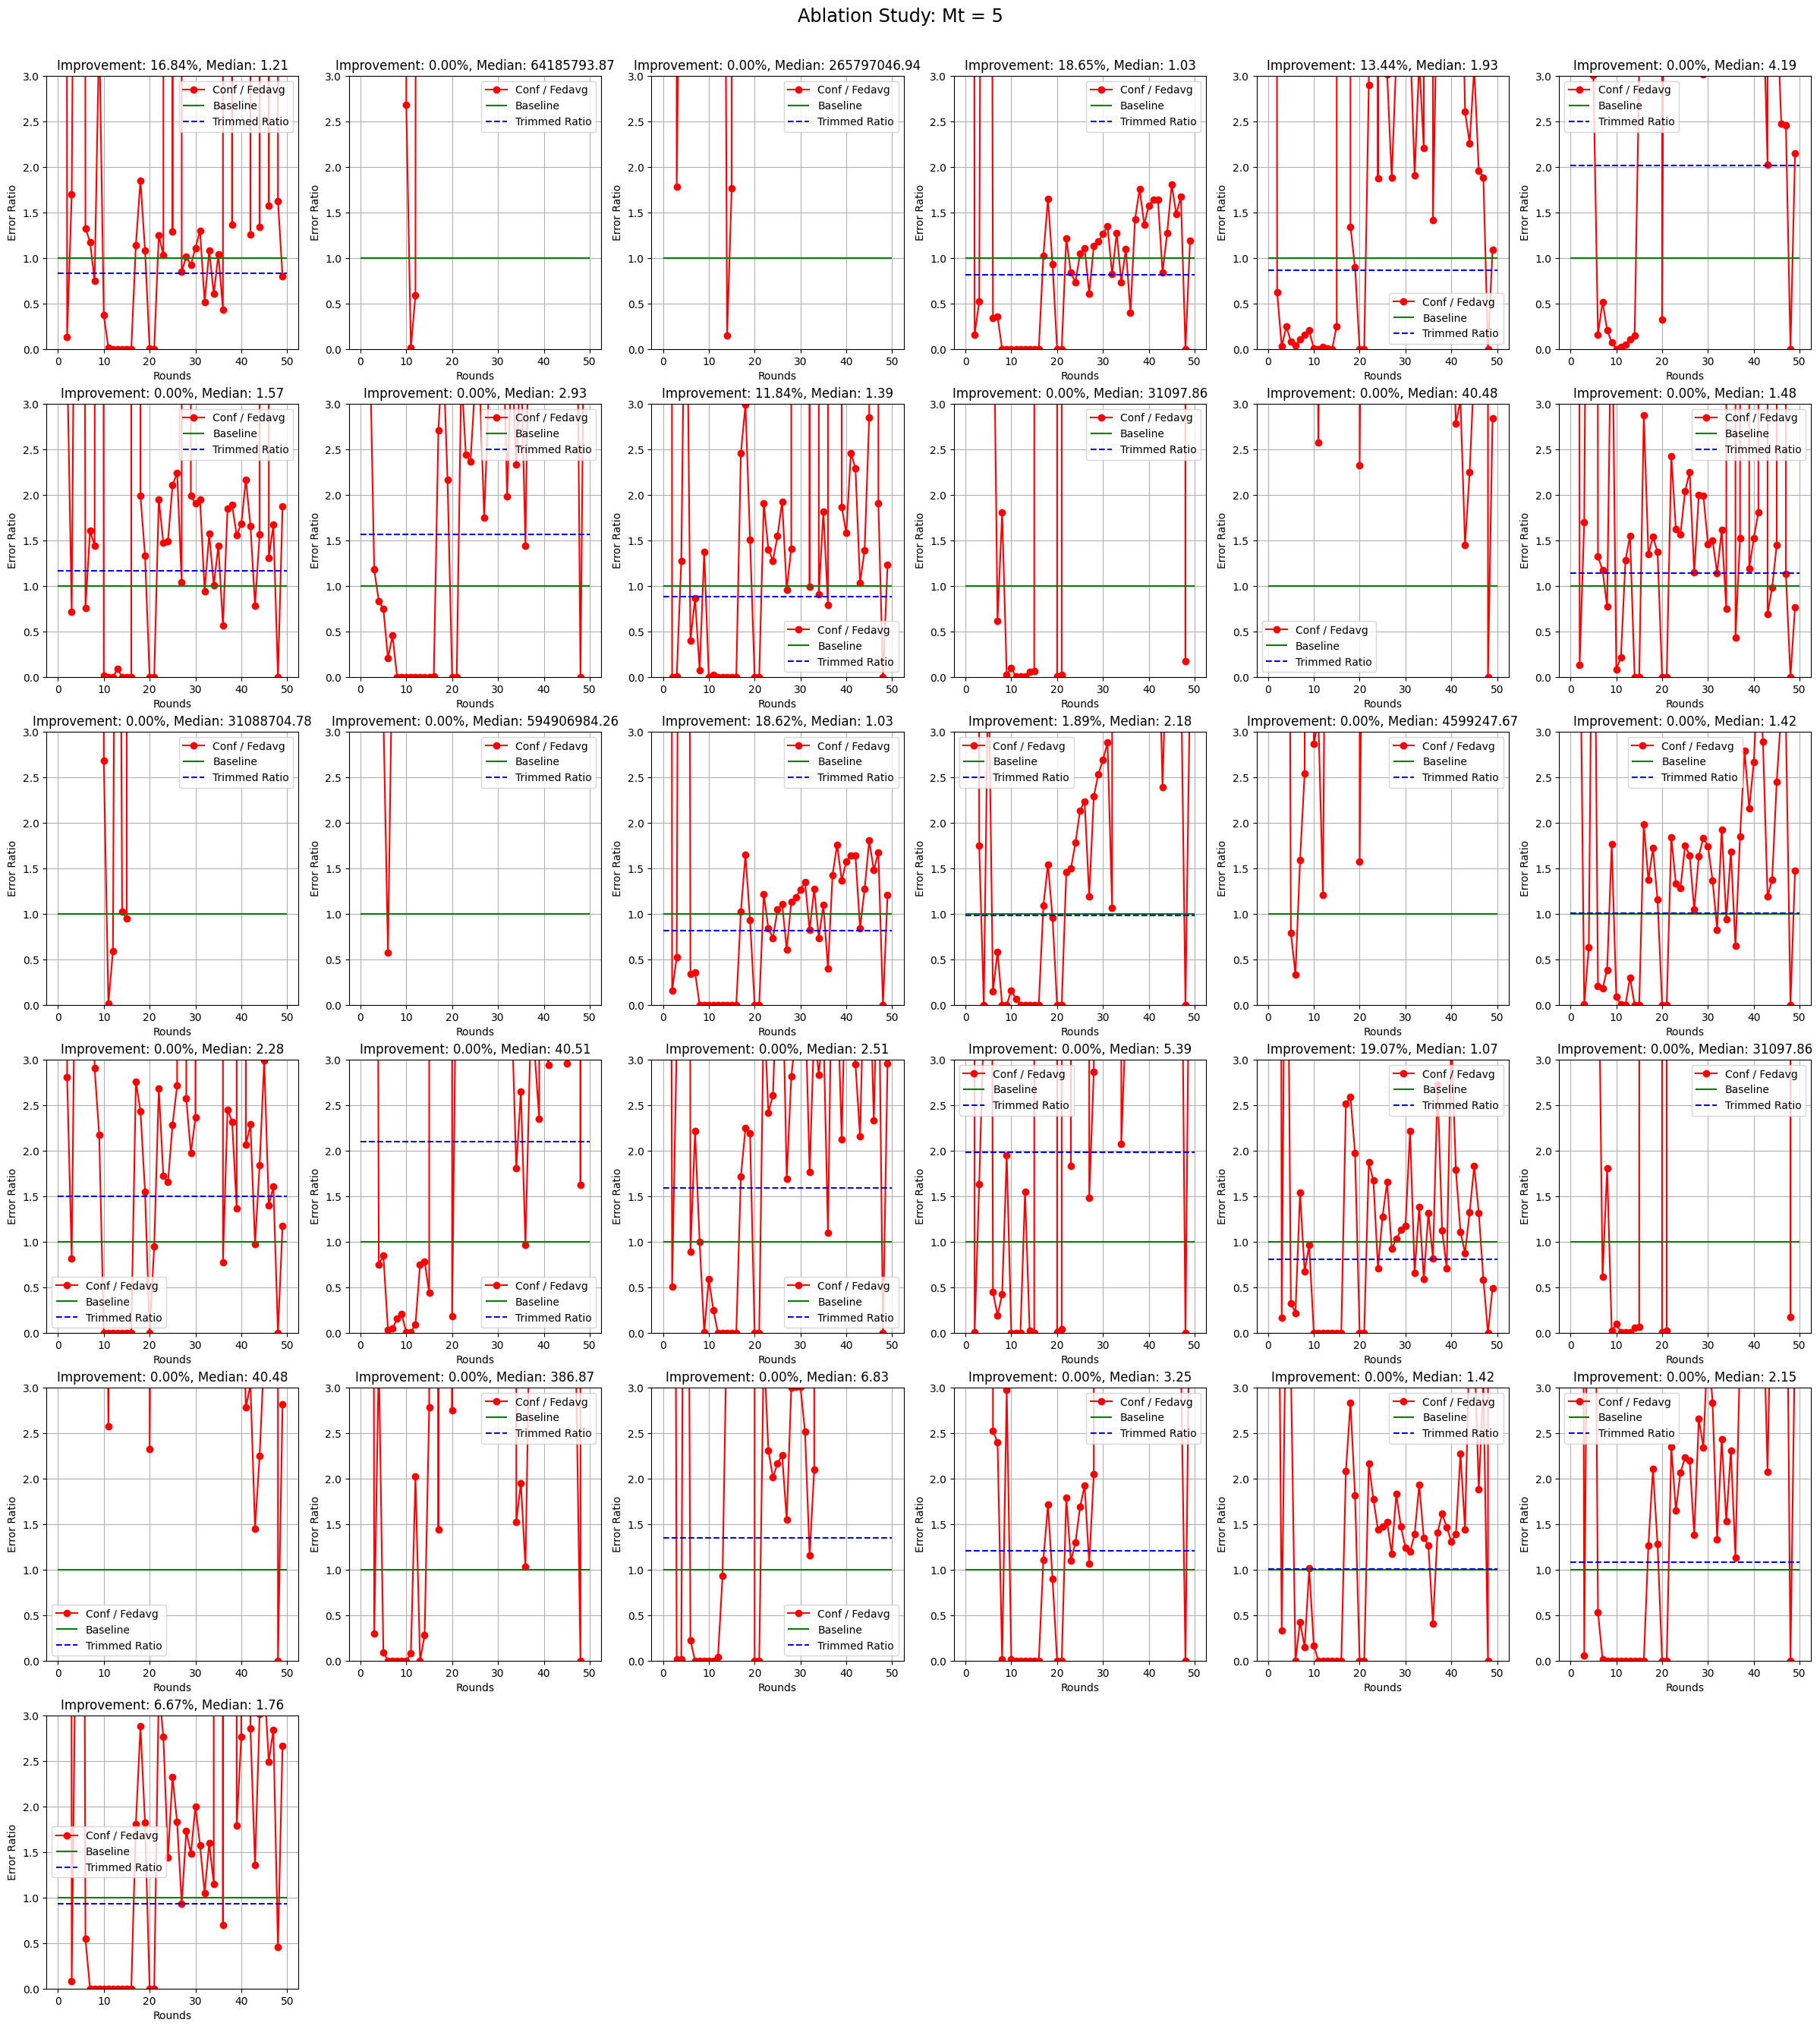

In [15]:
test.confeddi_as_improvement_plots((30, 30), 6, 6, ylim = (0, 3), trim_bias = 1, top = 0.95)

In [15]:
wb_set_2 = wb_histories[1]
for w, b in wb_set_2.values():
    test.average_error((w, b), 0)

Avg Error: 2.3994359279733173
Avg Error: 3.383599264692631
Avg Error: 3.360457296076557
Avg Error: 3.7667761031951232
Avg Error: 2.7668238681860644
Avg Error: 4.824194445575644
Avg Error: 3.2080463779557418
Avg Error: 3.170826355004491
Avg Error: 2.7125316976266456
Avg Error: 2.894745083180113
Avg Error: 3.59223379668122
Avg Error: 3.152605586331466
Avg Error: 85.16039606650581
Avg Error: 43.669903369846956
Avg Error: 3.7667761031951232
Avg Error: 1.871821748158733
Avg Error: 3.349485334870963
Avg Error: 3.559141186781276
Avg Error: 3.1310588279747678
Avg Error: 2.7342483944672153
Avg Error: 3.236290300608045
Avg Error: 4.905108648141379
Avg Error: 3.696526039875491
Avg Error: 3.4306971481493718
Avg Error: 3.3104547025219544
Avg Error: 3.091236098409908
Avg Error: 43.86421005083437
Avg Error: 3.962920014160169
Avg Error: 2.856855918871449
Avg Error: 3.178564875984696
Avg Error: 1.572342826915489


In [30]:
# (3,), (3, 4), (0, 2, 4)